In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

plt.rcParams.update({'figure.max_open_warning': 0})

In [4]:
from PIL import Image

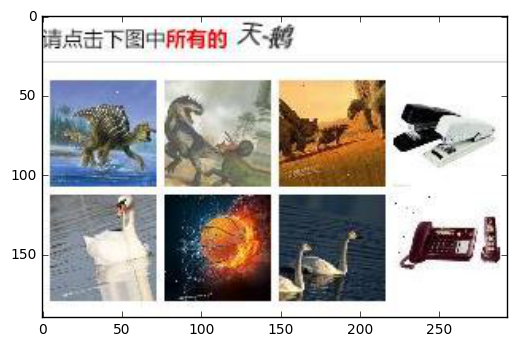

In [5]:
img = Image.open('../data/captcha_0.jpg')
plt.imshow(img)

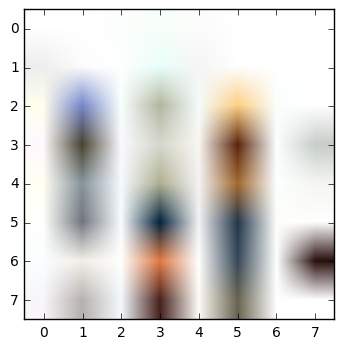

In [5]:
shrinked_size = 8
img = img.resize((shrinked_size, shrinked_size))
plt.imshow(img)

In [6]:
img_arr = np.asanyarray(img)
print 'Image array shape: {}'.format(img_arr.shape)

r_channel, g_channel, b_channel = img_arr[:, :, 0], img_arr[:, :, 1], img_arr[:, :, 2]
r_mean, g_mean, b_mean = r_channel.mean(), g_channel.mean(), b_channel.mean()
r_filtered, g_filtered, b_filtered = 1 * (r_channel > r_mean), 1 * (g_channel > g_mean), 1 * (b_channel > b_mean)
r_flatten, g_flatten, b_flatten = map(lambda filt: filt.flatten(), [r_filtered, g_filtered, b_filtered])

Image array shape: (8, 8, 3)


In [7]:
phash = np.concatenate((r_flatten, g_flatten, b_flatten))

In [6]:
from __init__ import calc_perceptual_hash
import os
from collections import defaultdict
import numpy as np

image_dir = '../../../Downloads/subimages/'
assert os.path.exists(image_dir)
image_paths = os.listdir(image_dir)


# there are 4312 sub-images from 539 CAPTCHAs in total.

def hamming_dist(hash1, hash2):
    assert isinstance(hash1, np.ndarray) and isinstance(hash2, np.ndarray)
    return np.sum(hash1 != hash2)


def test1():
    gray_hash_buckets = defaultdict(list)
    for cur_path in image_paths:
        # The gray_hash needs to be hashable
        gray_hash = ''.join(map(str, calc_perceptual_hash(os.path.join(image_dir, cur_path), mode='GRAY')))
        rgb_hash = calc_perceptual_hash(os.path.join(image_dir, cur_path), mode='RGB')

        for _rgb_hash in gray_hash_buckets[gray_hash]:
            if hamming_dist(rgb_hash, _rgb_hash) < 10:
                break
        else:
            # If we cannot find any "similar" images inside
            gray_hash_buckets[gray_hash].append(rgb_hash)

    print sum(map(len, gray_hash_buckets.values())) / float(len(image_paths))
    # 0.849953617811
test1()

0.849953617811


11
10
10
10
10
10
10
10
10
10
11
10
10
11
10
10
13
0.849953617811


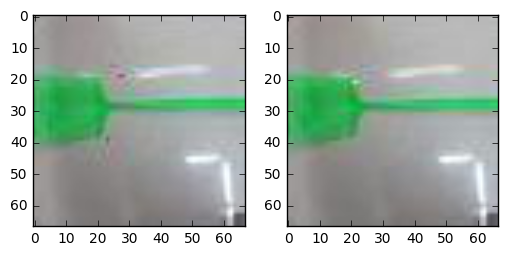

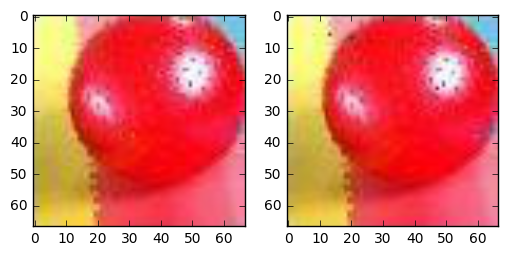

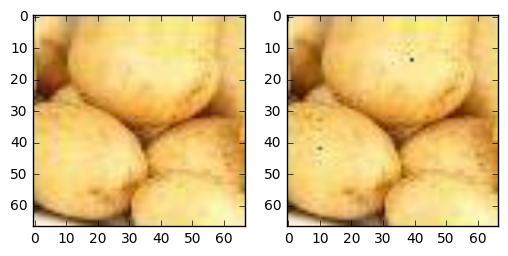

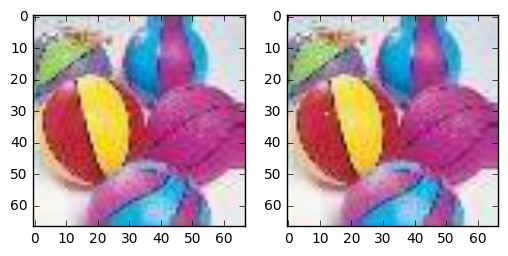

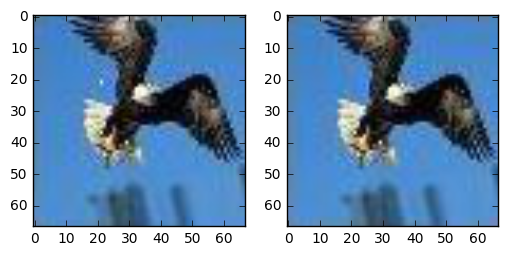

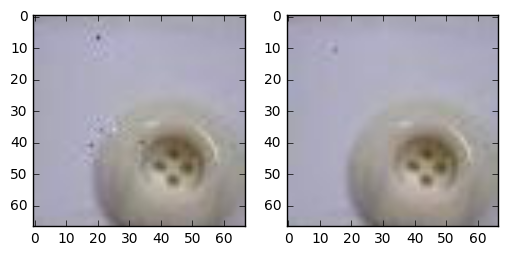

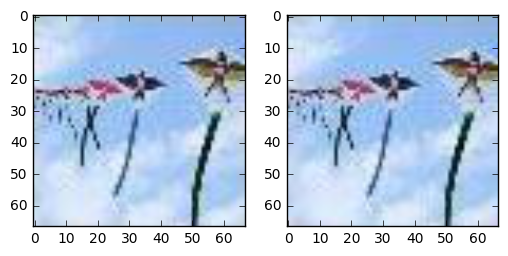

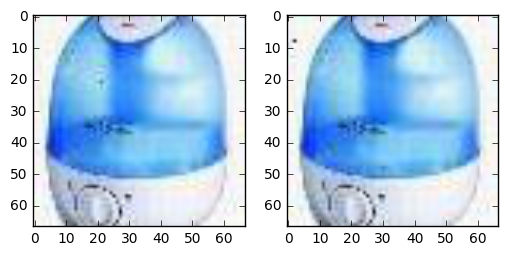

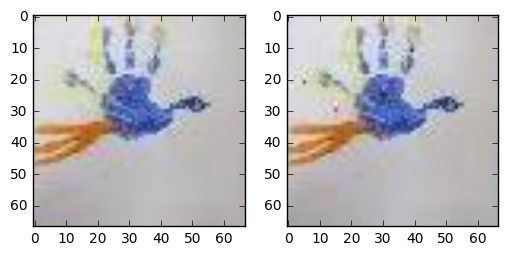

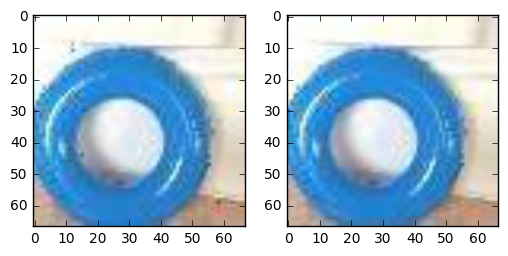

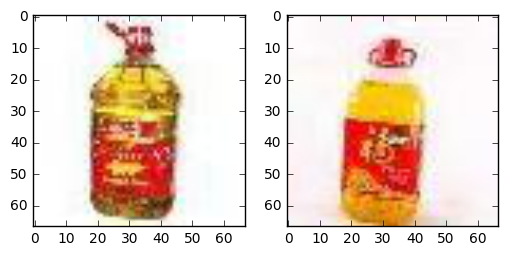

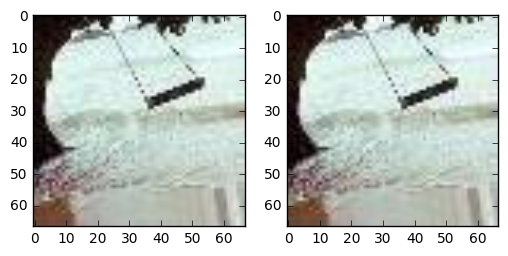

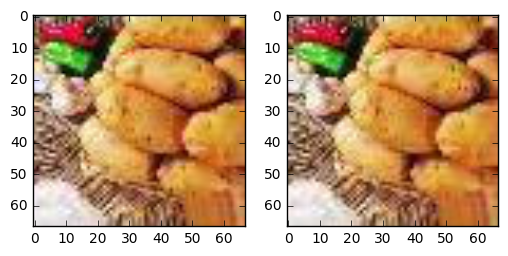

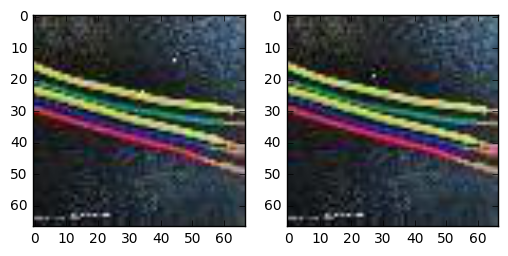

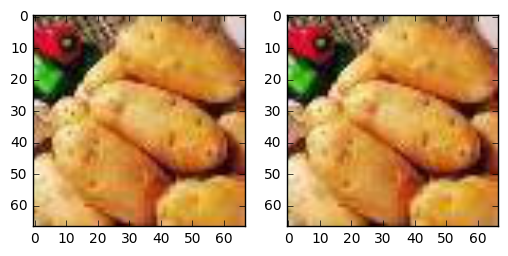

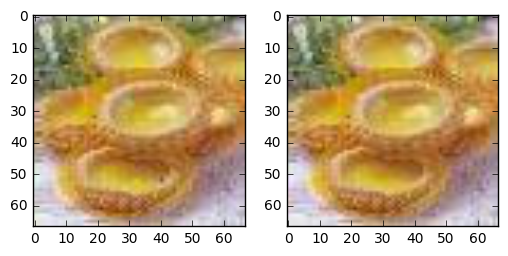

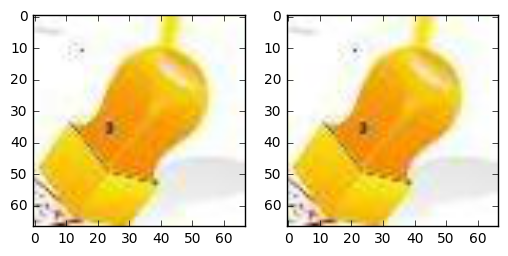

In [19]:
from PIL import Image

def test2():
    
    gray_hash_path_buckets = defaultdict(list)
    all_dist = []
    for cur_path in image_paths:
        # The gray_hash needs to be hashable
        gray_hash = ''.join(map(str, calc_perceptual_hash(os.path.join(image_dir, cur_path), mode='GRAY')))
        rgb_hash = calc_perceptual_hash(os.path.join(image_dir, cur_path), mode='RGB')

        for prev_path in gray_hash_path_buckets[gray_hash]:
            _rgb_hash = calc_perceptual_hash(os.path.join(image_dir, prev_path))
            dist = hamming_dist(rgb_hash, _rgb_hash)
            if dist < 10:
                all_dist.append(dist)
                break
                if False:
                    cur_image = Image.open(os.path.join(image_dir, cur_path))
                    prev_image = Image.open(os.path.join(image_dir, prev_path))
                    print dist
                    plt.figure()
                    plt.subplot(1, 2, 1)
                    plt.imshow(cur_image)
                    plt.subplot(1, 2, 2)
                    plt.imshow(prev_image)
            if dist >= 10 and dist <= 15:
                if True:
                    cur_image = Image.open(os.path.join(image_dir, cur_path))
                    prev_image = Image.open(os.path.join(image_dir, prev_path))
                    print dist
                    plt.figure()
                    plt.subplot(1, 2, 1)
                    plt.imshow(cur_image)
                    plt.subplot(1, 2, 2)
                    plt.imshow(prev_image)
            
        else:
            # If we cannot find any "similar" images inside
            gray_hash_path_buckets[gray_hash].append(cur_path)

    print sum(map(len, gray_hash_path_buckets.values())) / float(len(image_paths))
    return all_dist
    # 0.849953617811
hamming_dists = test2()

In [18]:
from collections import Counter
c = Counter(hamming_dists)
from pprint import pprint
pprint(map(lambda t: (t[0], t[1] / float(len(hamming_dists))), c.most_common()))

[(0, 0.29668674698795183),
 (1, 0.1852409638554217),
 (2, 0.1566265060240964),
 (3, 0.0963855421686747),
 (4, 0.0858433734939759),
 (5, 0.061746987951807226),
 (6, 0.045180722891566265),
 (10, 0.01957831325301205),
 (7, 0.016566265060240965),
 (8, 0.016566265060240965),
 (9, 0.01355421686746988),
 (11, 0.004518072289156626),
 (13, 0.0015060240963855422)]
